### GRUPO-B. Ferramentas de Data Science

#### B-1. Escrever script em Python, que execute em um notebook Jupyter, para acessar os dados da APAC de medicamentos no PostgreSQL.

Os quatro primeiros blocos deste arquivo são responsáveis por, nesta ordem, importar as bibliotecas utilizadas, realizar a conexão com
o banco de dados, estabelecer um script padrão para consulta na tabela `apac_medicamentos` e criar algumas funções de
consulta que serão utilizadas para a análise descritiva dos dados (bloco `B-2`).

#### B-2. Uma vez realizada a carga dos dados em um notebook Jupyter, realizar pelo menos uma análise descritiva dos dados da APAC de medicamentos.

Os demais blocos realizam a consulta e transformação dos dados para plotagens e análises descritivas que serão
postas nos seus respectivos lugares.

In [1]:
import pandas as pd
from A2.import_data_to_db import DBConnection # biblioteca para conexão com o banco de dados
import matplotlib.pyplot as plt
import seaborn as sns

PyTables is not installed. No support for HDF output.
SQLalchemy is not installed. No support for SQL output.


In [2]:
# Substituir essas variáveis de conexão!!!

db_conn = DBConnection(host='localhost', db='cdcs_challenge', usr='postgres', pwd='sergtsop')

In [3]:
sql_base = 'SELECT am.*, uf.* FROM apac_medicamentos AS am INNER JOIN unidade_federativa uf ON uf.uf_cod = am.uf_id '

In [4]:
def query_from_cid(cid_code):
    query = sql_base + f" WHERE ap_cidpri = '{cid_code}'"
    return pd.read_sql_query(query, db_conn._db)


def query_from_state_month():
    query = "select count(am.*) as total, am.ap_mvm, uf.uf_nome, uf.uf_populacao from apac_medicamentos as am inner join unidade_federativa uf on uf.uf_cod = am.uf_id group by am.ap_mvm, uf.uf_nome, uf_populacao order by am.ap_mvm;"
    return pd.read_sql_query(query, db_conn._db)

'''
A relação de faixa etária deu-se por base no estatudo da criança e do adolescente, considerando crianças os indivíduos
com idade igual ou inferior a 12 anos e adolescentes com idade igual ou inferior a 18 anos.

Os gropos de adultos e idosos foram classificados com base na lei da previdência, considerando idosos os indivíduos com
idade superior a 60 anos
'''

def query_from_age_group():
    query = '''
    SELECT CASE WHEN am.ap_nuidade <= '12' THEN '1 - crianças'
            WHEN am.ap_nuidade <= '18' THEN '2 - adolescentes'
            WHEN am.ap_nuidade <= '59' THEN '3 - adultos'
            ELSE '4 - idosos' END
       AS faixa_etaria, am.ap_sexo, count(*) as total
    FROM apac_medicamentos as am
    GROUP BY faixa_etaria, am.ap_sexo
    ORDER BY faixa_etaria
    '''
    return pd.read_sql_query(query, db_conn._db)

In [5]:
def plot_df(df):
    width = .35
    # df.plot(kind='bar', width=width, grid=True)
    df.plot.bar(grid=True, figsize=(12,12))
    # df_uf_month['uf_nome'].plot(secondary_y=True)

    ax = plt.gca()
    # plt.xlim([-width, len(df.index.unique())-width])
    # ax.set_xticklabels((','.join(x for x in df_plt['ap_mvm'].unique())))
    plt.xlabel("Unidades federativas")
    plt.ylabel("Quantitativo de registros")
    plt.yticks(fontsize=12)
    plt.title("Relação de atendimento por unidades federativas", fontsize=18)
    plt.show()

def plot_df_line(df):
    width = .35
    df.plot(kind='line', grid=True)
    # df_uf_month['uf_nome'].plot(secondary_y=True)

    ax = plt.gca()
    plt.xlim([-width, len(df.index.unique())-width])
    # ax.set_xticklabels((','.join(x for x in df_plt['ap_mvm'].unique())))
    plt.show()

In [6]:
df_cid = query_from_cid('N180')
df_cid

,id,uf_id,ap_mvm,ap_condic,ap_gestao,ap_coduni,ap_autoriz,ap_cmp,ap_pripal,ap_vl_ap,...,am_altura,am_transpl,am_qtdtran,am_gestant,ap_natjur,uf_cod,uf_nome,uf_sigla,uf_regiao,uf_populacao
0,16712400,35,202001,EP,350000,3554481,3519257789058,202001,0604620039,0.0,...,140,S,01,N,1023,35,São Paulo,SP,Sudeste,46695936
1,16712402,35,202001,EP,350000,2092603,3520205414715,202001,0604620039,0.0,...,165,N,00,N,1023,35,São Paulo,SP,Sudeste,46695936
2,16712403,35,202001,EP,350000,2749769,3519263775313,202001,0604620039,0.0,...,172,N,00,N,1023,35,São Paulo,SP,Sudeste,46695936
3,16712405,35,202001,EP,350000,2749769,3519258811673,202001,0604620039,0.0,...,165,N,00,N,1023,35,São Paulo,SP,Sudeste,46695936
4,16712408,35,202001,EP,350000,2749769,3519263771826,202001,0604620039,0.0,...,173,N,00,N,1023,35,São Paulo,SP,Sudeste,46695936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739463,16710936,35,202001,EP,350000,3554481,3520202575802,202001,0604770014,0.0,...,180,S,01,N,1023,35,São Paulo,SP,Sudeste,46695936
739464,16699508,35,202001,EP,350000,7661568,3519258177061,202001,0604620039,0.0,...,172,N,00,N,1023,35,São Paulo,SP,Sudeste,46695936
739465,16699509,35,202001,EP,350000,6544290,3519262896204,202001,0604620039,0.0,...,145,N,00,N,1023,35,São Paulo,SP,Sudeste,46695936
739466,16699511,35,202001,EP,350000,6503829,3520201785606,202001,0604620039,0.0,...,080,N,00,N,1023,35,São Paulo,SP,Sudeste,46695936


Realzia a consulta dos dados da apac_medicamentos, retornando o número total de registros agrupados por
unidades federativas. Este dataset será utilizado em duas análises descritivas, conforme detalhado a seguir.

In [7]:
df_uf_month = query_from_state_month()
df_uf_month

,total,ap_mvm,uf_nome,uf_populacao
0,7027,202001,Acre,908731
1,30004,202001,Alagoas,3367123
2,1104,202001,Amapá,879836
3,9699,202001,Amazonas,4278834
4,92328,202001,Bahia,14991039
...,...,...,...,...
156,1319,202006,Roraima,643862
157,105040,202006,Santa Catarina,7349317
158,848261,202006,São Paulo,46695936
159,13187,202006,Sergipe,2341319


Utilizando o dataset de consulta agrupada dos totalizadores por unidades federativas, este bloco calcula a média por
período (`ap_mvm`) e adiciona o totalizador do país (`soma da média / número de unidades federativas`).

In [8]:
df_plt_month = df_uf_month.copy()
df_plt_month = df_plt_month.drop(columns=['uf_populacao']).groupby(by=['uf_nome'], as_index=False).mean()
df_plt_month = df_plt_month.rename(index={'total': 'Média de atendimentos'})
df_plt_month = df_plt_month.sort_values(by='total')
df_plt_month = df_plt_month.append({'uf_nome': 'Brasil', 'total': (df_plt_month['total'].sum(axis=0)/len(df_plt_month['uf_nome'].unique()))}, ignore_index=True)
df_plt_month

,uf_nome,total
0,Roraima,1179.000000
1,Amapá,1210.000000
2,Tocantins,3826.833333
3,Acre,4063.666667
4,Pará,6653.500000
5,Rondônia,8389.000000
6,Amazonas,9237.333333
7,Sergipe,12595.000000
8,Piauí,14662.500000
9,Mato Grosso,14983.166667


In [9]:
# Calcula o percentual de antendimentos de São Paulo com relação ao país inteiro
df_1 = df_plt_month[(df_plt_month['uf_nome'] != 'Brasil')]
total_sp = df_1[(df_1['uf_nome'] == 'São Paulo')]['total'].sum(axis=0)
total_sp_p = total_sp/df_1['total'].sum(axis=0)
total_sp_p

0.4311240508724141

In [10]:
# Calcula o percentual da população de São Paulo com relação ao país inteiro
df_2 = df_uf_month[['uf_nome', 'uf_populacao']].groupby(by=['uf_nome', 'uf_populacao'], as_index=False).nunique()
total_sp2 = df_2[(df_2['uf_nome'] == 'São Paulo')]['uf_populacao'].sum(axis=0)
total_sp2_p = total_sp2/df_2['uf_populacao'].sum(axis=0)
total_sp2_p

0.21870976145400037

O gráfico a seguir apresenta a relação de atendimento (média do período de 6 meses - janeiro a junho de 2020) por
unidades federativas. Conforme observado, o estado de São Paulo é responsável por grande parte dos atendimentos (cerca
de ~43.1% da média geral). Tal fato deve ser explicado por conta da densidade populacional do estado, que representa ~21.8%
do total da população, com base nos dados do IBGE e nos cálculos anteriores.

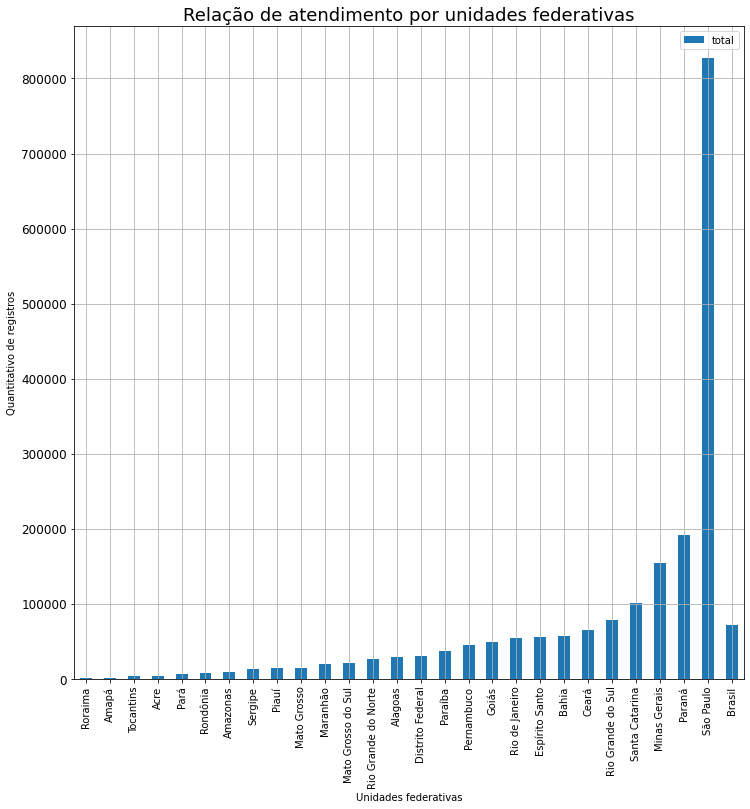

In [11]:
df_plt_month = df_plt_month.set_index(['uf_nome'])
plot_df(df_plt_month)

In [ ]:
# df_plt_month_pie = df_plt_month.copy()
# df_plt_month_pie = df_plt_month_pie.reset_index()
# df_plt_month_pie = df_plt_month_pie[(df_plt_month_pie['uf_nome'] != 'Brasil')]
# df_plt_month_pie = df_plt_month_pie.set_index(['uf_nome'])
# df_plt_month_pie

In [ ]:
# df_plt_month_pie.plot.pie(y='total', legend=False, figsize=(12, 12))

Devido a discrepância no gráfico anterior (por conta do estado de São Paulo), e para permitir uma comparação mais
apropriada, os dados foram padronizados realizando uma conversão dos valores totais
com base na população de 100.000 habitantes.

In [12]:
df_plt_uf = df_uf_month.copy()
df_plt_uf['total_100_k'] = (df_plt_uf['total']/df_plt_uf['uf_populacao'])*100000
df_plt_uf = df_plt_uf.drop(columns=['uf_populacao', 'total']).groupby(by=['uf_nome'], as_index=False).mean()
df_plt_uf = df_plt_uf.sort_values(by='total_100_k')
df_plt_uf = df_plt_uf.append({'uf_nome': 'Brasil', 'total_100_k': (df_plt_uf['total_100_k'].sum(axis=0)/len(df_plt_uf['uf_nome'].unique()))}, ignore_index=True)
df_plt_uf = df_plt_uf.rename({'total_100_k': 'Média de atendimentos (por 100.000 habitantes)'}, axis='columns')
df_plt_uf = df_plt_uf.set_index(['uf_nome'])
df_plt_uf

,Média de atendimentos (por 100.000 habitantes)
uf_nome,
Pará,75.695167
Amapá,137.525630
Roraima,183.113773
Amazonas,215.884359
Tocantins,237.728426
Maranhão,269.455257
Rio de Janeiro,310.046225
Bahia,380.682976
Mato Grosso,419.435133


Nesta representação, o estado de São Paulo contunua liderando o ranking com mais atendimentos, com cerca de ~1772
registros por 100.000 habitantes, seguido pelos estados do Paraná e Santa Catarina com ~1656 e ~1347 registros, respectivamente.

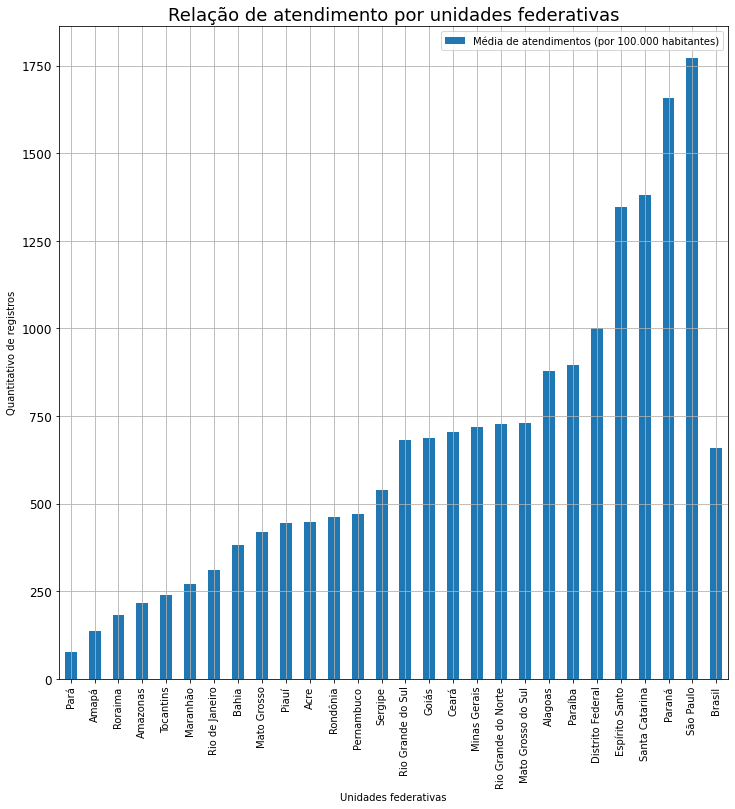

In [13]:
plot_df(df_plt_uf)
# plot_df_line(df_plt_month)

Os dados a seguir apresentam a relação de faixa etária de todos os registros no período analisado. A distribuição de
faixa etária foi realizada conforme o Estatuto da Criança e do Adolescente (ECA), conforme explicado na função de consulta.


In [14]:
df_age_group = query_from_age_group()
df_age_group

,faixa_etaria,ap_sexo,total
0,1 - crianças,F,209224
1,1 - crianças,M,191237
2,2 - adolescentes,F,141808
3,2 - adolescentes,M,201695
4,3 - adultos,F,3159168
5,3 - adultos,M,2388956
6,4 - idosos,F,3107646
7,4 - idosos,M,2120821


In [15]:
# df_age_plt = df_age_group.set_index(['faixa_etaria', 'ap_sexo'])
df_age_plt = df_age_group.copy()
df_age_plt

,faixa_etaria,ap_sexo,total
0,1 - crianças,F,209224
1,1 - crianças,M,191237
2,2 - adolescentes,F,141808
3,2 - adolescentes,M,201695
4,3 - adultos,F,3159168
5,3 - adultos,M,2388956
6,4 - idosos,F,3107646
7,4 - idosos,M,2120821


In [16]:
df_age_plt['piram'] = df_age_plt[['total', 'ap_sexo']].apply(lambda x: x['total'] if x['ap_sexo'] == 'F' else x['total']*(-1), axis=1)
df_age_plt

,faixa_etaria,ap_sexo,total,piram
0,1 - crianças,F,209224,209224
1,1 - crianças,M,191237,-191237
2,2 - adolescentes,F,141808,141808
3,2 - adolescentes,M,201695,-201695
4,3 - adultos,F,3159168,3159168
5,3 - adultos,M,2388956,-2388956
6,4 - idosos,F,3107646,3107646
7,4 - idosos,M,2120821,-2120821


Conforme apresentado na figura a seguir, as mulheres adultas (entre 18 e 59 anos) são as que mais possuem
registros (3.159.168), seguido pelas mulheres idosas (3.107.646). As crianças e adolescentes do sexo masculino
representam os menores índices de registros, sendo 191.237 e 201.695, respectivamente.

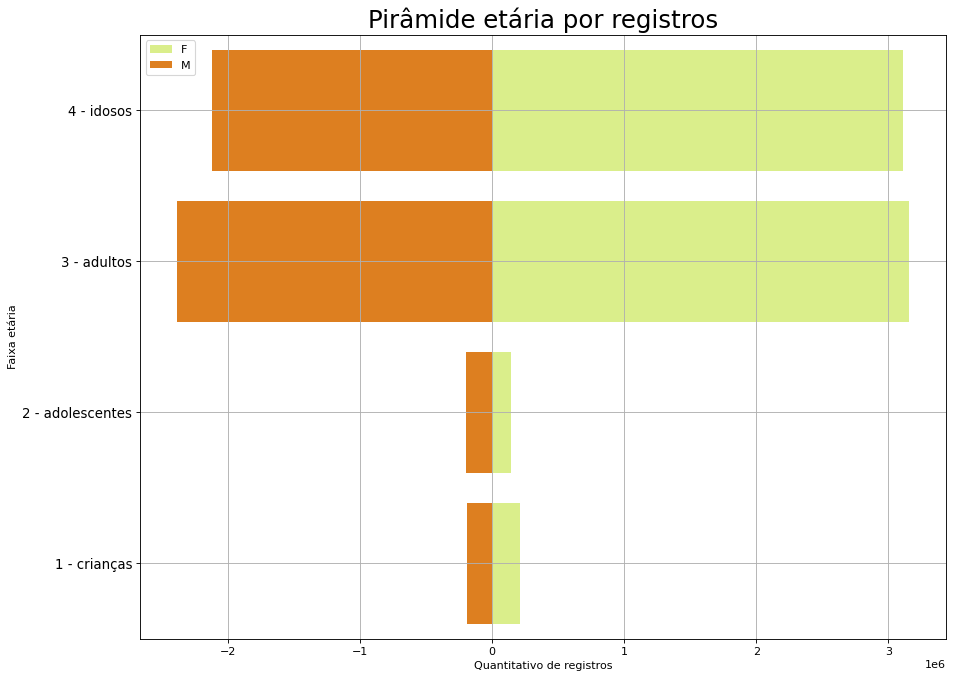

In [17]:
plt.figure(figsize=(13,10), dpi=80)
group_col = 'ap_sexo'

ordem_barras = df_age_plt.faixa_etaria.unique()[::-1]

colors = [plt.cm.Wistia(i/float(len(df_age_plt[group_col].unique())-1)) for i in range(len(df_age_plt[group_col].unique()))]

for c, group in zip(colors, df_age_plt[group_col].unique()):
    sns.barplot(x='piram', y='faixa_etaria',
                data = df_age_plt.loc[df_age_plt[group_col] == group, :],
                order=ordem_barras, color=c, label=group)

plt.xlabel("Quantitativo de registros")
plt.ylabel("Faixa etária")
plt.yticks(fontsize=12)
plt.title("Pirâmide etária por registros", fontsize=22)
plt.legend()
plt.grid()
plt.show()